In [1]:
# We will need some functionality 
from typing import List 

import time

# and from math related libraries
import qutip as qt

import matplotlib.pyplot as plt

# and from qiskit
from qiskit.extensions import HamiltonianGate
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import Operator

import numpy as np
import pylab

from qiskit import Aer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.opflow import I, X, Z

from qiskit.utils.mitigation import CompleteMeasFitter

from qiskit.circuit import Parameter

In [2]:
from ipynb.fs.full.da_vqe import analog_ansatz, get_conv_time, get_eigenvalue, get_ham_operator, get_ham_operator, plot_connectivity, get_connections_matrix

Coefficient Recommended 0.3333333333333333
Number of qubits: 4
Data Gathered 1/5
Data Gathered 2/5
Data Gathered 3/5
Data Gathered 4/5
Data Gathered 5/5


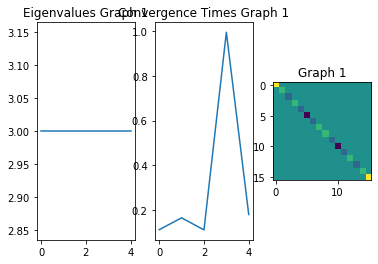

Coefficient Recommended 0.3333333333333333
Number of qubits: 4
Data Gathered 1/5
Data Gathered 2/5
Data Gathered 3/5
Data Gathered 4/5
Data Gathered 5/5


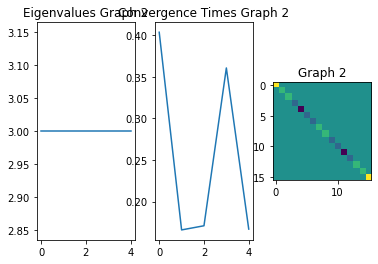

Coefficient Recommended 0.25
Number of qubits: 4


In [ ]:
#H2_op = (-1.052373245772859 * I ^ I) + (0.39793742484318045 * I ^ Z) + (-0.39793742484318045 * Z ^ I) + (-0.01128010425623538 * Z ^ Z) + (0.18093119978423156 * X ^ X)
qubits_count = 4

seed = 170
iterations = 500
algorithm_globals.random_seed = seed
backend = Aer.get_backend('aer_simulator')
qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed) 

for chosen_graph in [1,2,3,4,5,6]:
    #chosen_graph = 2
    connections,coeff = get_connections_matrix(chosen_graph)
    print("Coefficient Recommended",coeff)

    chosen_op = get_ham_operator(qubits_count,connections,1.0)

    hamiltonian = chosen_op.to_matrix()
    ham_block = HamiltonianGate(data=hamiltonian, time=2) 

    print(f'Number of qubits: {chosen_op.num_qubits}')

    ana_conv_times = []
    #ana_conv_series = []
    ana_eig_vals = []
    blocks = 1
    for it in range(5):
        printing = False
        ana_dats = get_eigenvalue("analog",qubits_count,chosen_op,qi,iterations,blocks,ham_block,printing)

        #ana_conv_series.append(ana_dats[1])
        ana_conv_times.append(ana_dats[2])
        ana_eig_vals.append(ana_dats[0])

        print('Data Gathered {}/5'.format(it+1))

    figure, axis = plt.subplots(1,3)
    axis[0].plot(ana_eig_vals)
    axis[0].set_title("Eigenvalues Graph {}".format(chosen_graph))

    axis[1].plot(ana_conv_times)
    axis[1].set_title("Convergence Times Graph {}".format(chosen_graph))
    
    axis[2].imshow(np.real(hamiltonian))
    #axis[2].colorbar()
    axis[2].set_title('Graph {}'.format(chosen_graph));
    plt.show()